In [1]:
# 

import pandas as pd
import seaborn as sns
sns.set()

import re, requests
from bs4 import BeautifulSoup

import datetime
from dateutil.relativedelta import relativedelta

In [2]:
# japanese plot setting

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font_path = '/usr/share/fonts/truetype/takao-gothic/TakaoGothic.ttf'  #DLしたパスを指定. /font以下でなくても良い
font_prop = FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()

In [4]:
# path

blog_save_dir = '/keyakizaka_mining/data/blog'

# new hinatazaka46

In [5]:
def get_hinata_articles_from_single_page( page_soup ):

    articles = []
    for i, j in enumerate( page_soup.find_all( 'div', class_='p-blog-article' ) ):
        author = j.find('div', class_='c-blog-article__name').text.replace(' ','').replace('\n','')
        datetime = j.find('div', class_='c-blog-article__date').text.strip()
        title = j.find('div', class_='c-blog-article__title').text.strip()
        body = j.find('div', class_='c-blog-article__text')
        text = body.text.strip()
        page_url = 'https://www.hinatazaka46.com' + j.find('div', class_='p-button__blog_detail').a.get('href')
        images = ''
        for img in  body.find_all('img'):
            images += '%s\t'% img.get('src')
        articles.append( [author, datetime, title, text, images, page_url] )    
    return articles

max_page_number = 427 # ...

all_articles = []
for page_idx in range( max_page_number, -1, -1 ):
    if page_idx % 50 == 0: print(page_idx)
    target_url = 'https://www.hinatazaka46.com/s/official/diary/member/list?ima=0000&page=%d&cd=member' % page_idx
    r = requests.get(target_url)
    soup = BeautifulSoup(r.text, 'lxml')
    page_articles = get_hinata_articles_from_single_page( soup )
    all_articles.extend( page_articles )

400
350
300
250
200
150
100
50
0


In [43]:
# check

df = pd.DataFrame( all_articles, columns=['author', 'datetime', 'title', 'text', 'images', 'url'] )
print( df.shape )
display( df.head(2) )
display( df.tail(2) )

(8529, 6)


,author,datetime,title,text,images,url
0,加藤史帆,2016.8.2 02:50,はじめまして( 。・о・。),はじめまして！ ひらがなけやきの加藤史帆です(｡･υ･)/ﾞ 今月から私たちひ...,https://cdn.hinatazaka46.com/images/14/aff/ed5...,https://www.hinatazaka46.com/s/official/diary/...
1,高本彩花,2016.8.2 02:46,はじめまして,はじめまして ひらがなけやきの高本彩花です。 8月からブログ書かせていただけることに...,https://cdn.hinatazaka46.com/images/14/913/41e...,https://www.hinatazaka46.com/s/official/diary/...


,author,datetime,title,text,images,url
8527,高本彩花,2019.7.23 23:19,🍒,こんにちは高本彩花です🍒🧜‍♀️先日、MUSIC STATIONさんに出演しました🎤キュンに...,https://cdn.hinatazaka46.com/files/14/diary/of...,https://www.hinatazaka46.com/s/official/diary/...
8528,上村ひなの,2019.7.23 23:17,"69,ゼラニウムの葉",こんにちは！\n\n\n日向坂46三期生\n中学三年生15歳の\n\nかみむら ひなの です...,https://cdn.hinatazaka46.com/images/14/6c6/b89...,https://www.hinatazaka46.com/s/official/diary/...


In [49]:
# save csv

datetime_str = datetime.datetime.today().strftime("%Y%m%d")
df.to_csv( '%s/hinatazaka46_blog_%s.csv' % (blog_save_dir, datetime_str), index=0 )

In [51]:
# read csv

df = pd.read_csv( '%s/hinatazaka46_blog_%s.csv' % (blog_save_dir, datetime_str) )

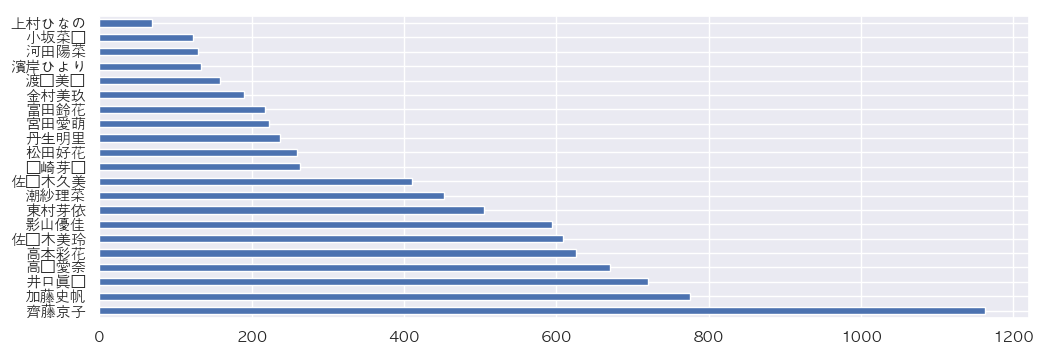

In [54]:
# plot article numbers each author

fig = plt.figure(figsize=(12,4),dpi=100)
df['author'].value_counts().plot(kind='barh')
plt.show()